# Gradient Descent

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from lab_utils_common import compute_cost_logistic, sigmoid, plot_data
from copy import deepcopy
import math
np.set_printoptions(precision=2)

In [3]:
plt.style.use("bmh")

## Use the previous Dataset for ease of understanding

In [4]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

## Logistic Gradient Descent

Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   

## Write the function for computing Gradient

In [7]:
def compute_gradient_logistic(X, y, w, b):
    m, n = X.shape
    
    g = sigmoid(X @ w + b)
    err = g - y
    
    dj_dw = (X.T @ err) / m
    dj_db = np.sum(err) / m
    
    return dj_dw, dj_db

In [9]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_dw_tmp, dj_db_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


## Write a function for computing Gradinet Descent

In [28]:
def compute_gradient_descent(X, y, w, b, alpha=0.01, iterations=1000):
    J_history = []
    w_history = []
    b_history = []
    
    m, n = X.shape
    
    for i in range(iterations):
        j = compute_cost_logistic(X, y, w, b)
        dj_dw, dj_db = compute_gradient_logistic(X, y, w, b)
        
        w = w - dj_dw
        b = b - dj_db
        
        if i < 10000:
            J_history.append(j)
            w_history.append(w)
            b_history.append(b)
            
        if i % math.ceil(iterations / 10) == 0:
            print(f"iter: {i}, cost: {j:.4f}, w: {w}, b: {b:.2f}, dj_dw: {dj_dw}, dj_db: {dj_db:.2f}")
        
    return w, b, J_history, w_history, b_history

In [29]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, J_history, w_history, b_history = compute_gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

iter: 0, cost: 0.6931, w: [0.25 0.17], b: 0.00, dj_dw: [-0.25 -0.17], dj_db: 0.00
iter: 1000, cost: 0.0171, w: [5.28 5.08], b: -14.23, dj_dw: [-0. -0.], dj_db: 0.00
iter: 2000, cost: 0.0085, w: [6.21 6.01], b: -16.78, dj_dw: [-0. -0.], dj_db: 0.00
iter: 3000, cost: 0.0057, w: [6.75 6.55], b: -18.28, dj_dw: [-0. -0.], dj_db: 0.00
iter: 4000, cost: 0.0042, w: [7.13 6.93], b: -19.33, dj_dw: [-0. -0.], dj_db: 0.00
iter: 5000, cost: 0.0034, w: [7.43 7.23], b: -20.15, dj_dw: [-0. -0.], dj_db: 0.00
iter: 6000, cost: 0.0028, w: [7.67 7.47], b: -20.82, dj_dw: [-0. -0.], dj_db: 0.00
iter: 7000, cost: 0.0024, w: [7.88 7.68], b: -21.38, dj_dw: [-0. -0.], dj_db: 0.00
iter: 8000, cost: 0.0021, w: [8.06 7.86], b: -21.87, dj_dw: [-0. -0.], dj_db: 0.00
iter: 9000, cost: 0.0019, w: [8.21 8.01], b: -22.31, dj_dw: [-0. -0.], dj_db: 0.00

updated parameters: w:[8.35 8.15], b:-22.691549496367948


## We will be plotting w vs cost

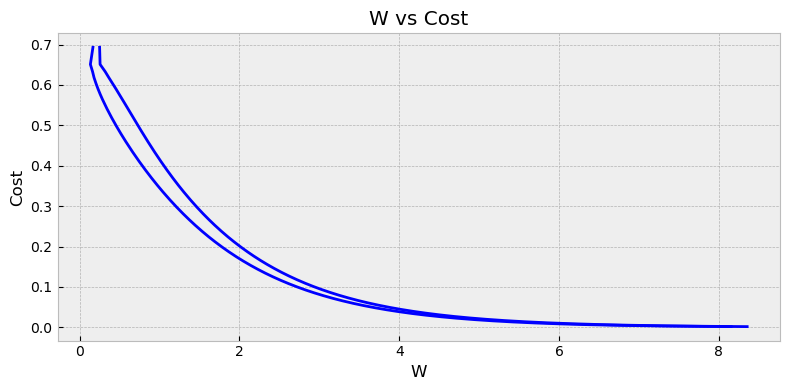

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(w_history, J_history, lw=2, c="b")

ax.set_title("W vs Cost")
ax.set_xlabel("W")
ax.set_ylabel("Cost")

plt.tight_layout()

## Try predictig the values

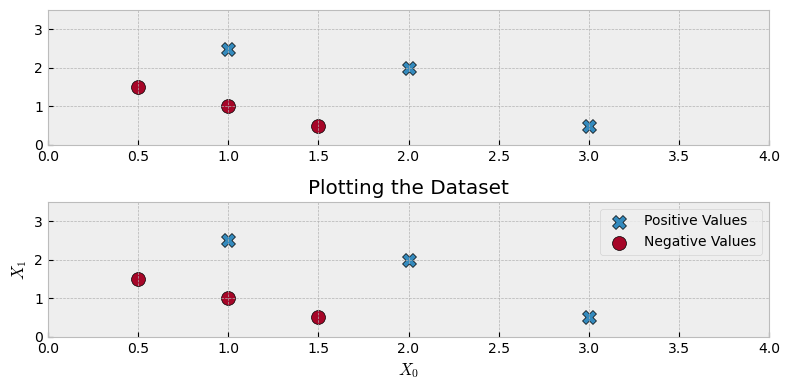

In [34]:
fig, ax = plt.subplots(2, 1, figsize=(8, 4))
pos = y_train == 1
neg = y_train == 0

prd_y_train = sigmoid(X_train @ w_out + b_out)
prd_pos = prd_y_train >= 0.5
prd_neg = prd_y_train < 0.5

ax[0].axis([0, 4, 0, 3.5])
ax[1].axis([0, 4, 0, 3.5])

ax[0].scatter(X_train[:, 0][pos], X_train[:, 1][pos], s=100, marker="X", edgecolor="black", label="Positive Values")
ax[0].scatter(X_train[:, 0][neg], X_train[:, 1][neg], s=100, marker= "o", edgecolor="black", label="Negative Values")

ax[1].scatter(X_train[:, 0][prd_pos], X_train[:, 1][prd_pos], s=100, marker="X", edgecolor="black", label="Positive Values")
ax[1].scatter(X_train[:, 0][prd_neg], X_train[:, 1][prd_neg], s=100, marker= "o", edgecolor="black", label="Negative Values")

plt.title("Plotting the Dataset")
ax[1].set_ylabel("$X_1$")
ax[1].set_xlabel("$X_0$")

plt.legend()
plt.tight_layout()